<a href="https://colab.research.google.com/github/carlgran/SIIM_ISIC_Competition/blob/master/test_NN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth

auth.authenticate_user()

In [2]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/iam/service_accounts/list.py
google-cloud-sdk/lib/surface/iam/service_accounts/remove_iam_policy_binding.yaml
google-cloud-sdk/lib/surface/iam/service_accounts/set_iam_policy.py
google-cloud-sdk/lib/surface/iam/service_accounts/sign_blob.py
google-cloud-sdk/lib/surface/iam/service_accounts/sign_jwt.py
google-cloud-sdk/lib/surface/iam/service_accounts/undelete.yaml
google-cloud-sdk/lib/surface/iam/service_accounts/update.yaml
google-cloud-sdk/lib/surface/iam/simulator/__init__.py
google-cloud-sdk/lib/surface/iam/simulator/replay_recent_access.py
google-cloud-sdk/lib/surface/iam/workload_identity_pools/__init__.py
google-cloud-sdk/lib/surface/iam/workload_identity_pools/create.yaml
google-cloud-sdk/lib/surface/iam/workload_identity_pools/delete.yaml
google-cloud-sdk/lib/surface/iam/workload_identity_pools/describe.yaml
google-cloud-sdk/lib/surface/iam/workload_identity_pools/list.yaml
google-cloud-sdk/lib/sur

In [3]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: cggranadosj@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] cggranadosj@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [cggranadosj@gmail.com].

Pick cloud project to use: 
 [1] third-h

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import Image, display
import os
from os.path import join
from sklearn.model_selection import train_test_split
import random,time


In [5]:
import tensorflow as tf

# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.49.48.154:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.49.48.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.49.48.154:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [ ]:
# from kaggle_datasets import KaggleDatasets
# !ls /kaggle/input/
# GCS_PATH = KaggleDatasets().get_gcs_path('siim-isic-melanoma-classification') # you can list the bucket with "!gsutil ls $GCS_PATH"
# !gsutil ls $GCS_PATH

ModuleNotFoundError: No module named 'kaggle_datasets'

# **Using .tf files and TPU**

In [6]:
# numpy and matplotlib defaults
np.set_printoptions(threshold=15, linewidth=80)
CLASSES = [0,1]

def batch_to_numpy_images_and_labels(data):
    images, labels, target = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    #if numpy_labels.dtype == object: # binary string in this case, these are image ID strings
    #    numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return CLASSES[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(CLASSES[label], 'OK' if correct else 'NO', u"\u2192" if not correct else '',
                                CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = label
        correct = True
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

In [ ]:
print(zip.__doc__)

zip(iter1 [,iter2 [...]]) --> zip object

Return a zip object whose .__next__() method returns a tuple where
the i-th element comes from the i-th iterable argument.  The .__next__()
method continues until the shortest iterable in the argument sequence
is exhausted and then it raises StopIteration.


In [7]:
def replacenan(img_features):
    img_feat = []
    for feat in img_features:
        #new_feat = tf.clip_by_value(feat, -1e12, 1e12)
        new_feat = tf.where(tf.math.is_nan(feat), tf.zeros_like(feat), feat)
        img_feat.append(new_feat)
    return img_feat


In [88]:
def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [*IMAGE_SIZE, 3]) # explicit size needed for TPU
    return image

def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_name": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        'patient_id': tf.io.FixedLenFeature([], tf.int64),
        'sex': tf.io.FixedLenFeature([], tf.int64),
        'age_approx': tf.io.FixedLenFeature([], tf.float32),
        'anatom_site_general_challenge': tf.io.FixedLenFeature([], tf.float32),
        "target": tf.io.FixedLenFeature([], tf.int64),
        'N_contours': tf.io.FixedLenFeature([], tf.int64), 
        'total_perimeter': tf.io.FixedLenFeature([], tf.float32), 
        'max_area': tf.io.FixedLenFeature([], tf.float32), 
        'total_area': tf.io.FixedLenFeature([], tf.float32),
        'max_complexity': tf.io.FixedLenFeature([], tf.float32), 
        'mean_complexity': tf.io.FixedLenFeature([], tf.float32), 
        'in_gray_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_gray': tf.io.FixedLenFeature([], tf.float32),
        'in_red_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_red': tf.io.FixedLenFeature([], tf.float32), 
        'in_green_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_green': tf.io.FixedLenFeature([], tf.float32), 
        'in_blue_mean': tf.io.FixedLenFeature([], tf.float32),
        'out_blue': tf.io.FixedLenFeature([], tf.float32), 
        'mean_red_ratio': tf.io.FixedLenFeature([], tf.float32), 
        'mean_green_ratio': tf.io.FixedLenFeature([], tf.float32), 
        'mean_blue_ratio': tf.io.FixedLenFeature([], tf.float32),
        'freq': tf.io.FixedLenFeature([], tf.float32)
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = example['image_name']
    age_approx = example['age_approx']
    anatom_site_general_challenge = example['anatom_site_general_challenge']
#     anatom_site_general_challenge = tf.dtypes.cast(example['anatom_site_general_challenge']
# , tf.int64)
    target = example['target']
    N_contours = example['N_contours']
    total_perimeter = example['total_perimeter']
    max_area = example['max_area']
    total_area = example['total_area']
    max_complexity = example['max_complexity']
    mean_complexity = example['mean_complexity']
    in_gray_mean = example['in_gray_mean'] 
    out_gray = example['out_gray']
    in_red_mean = example['in_red_mean']
    out_red = example['out_red'] 
    in_green_mean = example['in_green_mean']
    out_green = example['out_green'] 
    in_blue_mean = example['in_blue_mean']
    out_blue = example['out_blue']
    mean_red_ratio = example['mean_red_ratio']
    mean_green_ratio = example['mean_green_ratio'] 
    mean_blue_ratio = example['mean_blue_ratio']
    freq = example['freq']
    meta_features = [age_approx, anatom_site_general_challenge]
    img_features = [age_approx, anatom_site_general_challenge, total_perimeter,
       max_area, total_area, max_complexity, mean_complexity,
       in_gray_mean, out_gray, in_red_mean, out_red, in_green_mean,
       out_green, in_blue_mean, out_blue, mean_red_ratio,
       mean_green_ratio, mean_blue_ratio, freq]
    
    img_feat = replacenan(img_features)
    meta_feat = replacenan(meta_features)
    
    return (image, img_feat), target # returns a dataset of (image, label) pairs

def read_labeled_tfrecord_test(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_name": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        'patient_id': tf.io.FixedLenFeature([], tf.int64),
        'sex': tf.io.FixedLenFeature([], tf.int64),
        'age_approx': tf.io.FixedLenFeature([], tf.float32),
        'anatom_site_general_challenge': tf.io.FixedLenFeature([], tf.float32),
        'N_contours': tf.io.FixedLenFeature([], tf.int64), 
        'total_perimeter': tf.io.FixedLenFeature([], tf.float32), 
        'max_area': tf.io.FixedLenFeature([], tf.float32), 
        'total_area': tf.io.FixedLenFeature([], tf.float32),
        'max_complexity': tf.io.FixedLenFeature([], tf.float32), 
        'mean_complexity': tf.io.FixedLenFeature([], tf.float32), 
        'in_gray_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_gray': tf.io.FixedLenFeature([], tf.float32),
        'in_red_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_red': tf.io.FixedLenFeature([], tf.float32), 
        'in_green_mean': tf.io.FixedLenFeature([], tf.float32), 
        'out_green': tf.io.FixedLenFeature([], tf.float32), 
        'in_blue_mean': tf.io.FixedLenFeature([], tf.float32),
        'out_blue': tf.io.FixedLenFeature([], tf.float32), 
        'mean_red_ratio': tf.io.FixedLenFeature([], tf.float32), 
        'mean_green_ratio': tf.io.FixedLenFeature([], tf.float32), 
        'mean_blue_ratio': tf.io.FixedLenFeature([], tf.float32),
        'freq': tf.io.FixedLenFeature([], tf.float32)
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = example['image_name']
    age_approx = example['age_approx']
    anatom_site_general_challenge = example['anatom_site_general_challenge']
#     anatom_site_general_challenge = tf.dtypes.cast(example['anatom_site_general_challenge']
# , tf.int64)
    N_contours = example['N_contours']
    total_perimeter = example['total_perimeter']
    max_area = example['max_area']
    total_area = example['total_area']
    max_complexity = example['max_complexity']
    mean_complexity = example['mean_complexity']
    in_gray_mean = example['in_gray_mean'] 
    out_gray = example['out_gray']
    in_red_mean = example['in_red_mean']
    out_red = example['out_red'] 
    in_green_mean = example['in_green_mean']
    out_green = example['out_green'] 
    in_blue_mean = example['in_blue_mean']
    out_blue = example['out_blue']
    mean_red_ratio = example['mean_red_ratio']
    mean_green_ratio = example['mean_green_ratio'] 
    mean_blue_ratio = example['mean_blue_ratio']
    freq = example['freq']
    meta_features = [age_approx, anatom_site_general_challenge]
    img_features = [age_approx, anatom_site_general_challenge, total_perimeter,
       max_area, total_area, max_complexity, mean_complexity,
       in_gray_mean, out_gray, in_red_mean, out_red, in_green_mean,
       out_green, in_blue_mean, out_blue, mean_red_ratio,
       mean_green_ratio, mean_blue_ratio, freq]
    
    img_feat = replacenan(img_features)
    meta_feat = replacenan(meta_features)
    
    return (image, img_feat), label # returns a dataset of (image, label) pairs


def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def load_dataset_test(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord_test)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def get_validation_dataset():
    dataset = load_dataset(VALIDATION_FILENAMES)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def get_test_dataset():
    dataset = load_dataset_test(TEST_FILENAMES)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset


def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

In [ ]:
import tensorflow_datasets as tfds

def input_fn():
    split = tfds.Split.TRAIN
    dataset = tfds.load('iris', split=split, as_supervised=True)
    dataset = dataset.map(lambda features, labels: ({'dense_input':features}, labels))
    dataset = dataset.batch(32).repeat()
    return dataset

In [ ]:
!mkdir tfrecords
!gsutil -m cp gs://siim_isic/tfrecords_256_2/*.tfrec tfrecords/

In [89]:
#looking at tfrecords
import matplotlib.pyplot as plt, cv2
import tensorflow as tf, re, math

IMAGE_SIZE= [256,256]; BATCH_SIZE = 32

AUTO = tf.data.experimental.AUTOTUNE

#tfr_path = '../input/siim-isic-melanoma-classification/tfrecords/'
#tfr_path = GCS_PATH + '/tfrecords/'
#tfr_path ='data/'
#tfr_path = 'tfrecords/'
tfr_path = 'gs://siim_isic/tfrecords_256_2/'


# INITIALIZE VARIABLES
TRAIN_FILENAMES = tf.io.gfile.glob(tfr_path + 'train*.tfrec')
TRAINING_FILENAMES, VALIDATION_FILENAMES = train_test_split(TRAIN_FILENAMES, train_size=0.8, test_size=0.2, random_state=1)
TEST_FILENAMES = tf.io.gfile.glob(tfr_path + 'test*.tfrec')
TRAIN_STEPS = count_data_items(TRAINING_FILENAMES) // BATCH_SIZE
EPOCHS = 12

print('There are %i train images'%count_data_items(TRAINING_FILENAMES), ", STEPS PER EPOCH: ", TRAIN_STEPS)
print('There are %i valid images'%count_data_items(VALIDATION_FILENAMES))
print('There are %i test images'%count_data_items(TEST_FILENAMES))


There are 24842 train images , STEPS PER EPOCH:  776
There are 8284 valid images
There are 10982 test images


In [90]:
# DISPLAY TRAIN IMAGES
training_dataset = get_training_dataset()
training_dataset = training_dataset.unbatch().batch(20)
train_batch = iter(training_dataset)

# DISPLAY TRAIN IMAGES
validation_dataset = get_validation_dataset()
validation_dataset = validation_dataset.unbatch().batch(20)
valid_batch = iter(validation_dataset)

# DISPLAY TRAIN IMAGES

test_dataset = get_test_dataset()
test_dataset = test_dataset.unbatch().batch(20)
test_batch = iter(test_dataset)



In [64]:
training_dataset

<BatchDataset shapes: (((None, 256, 256, 3), (None, 19)), (None,)), types: ((tf.float32, tf.float32), tf.int64)>

In [ ]:
counter = 0
nan_count = 0
for feat in training_dataset.take(1000):
    counter += 1
    check_feat=feat[0][1].numpy()
    print(counter, nan_count)
    nan_array=np.argwhere(np.isnan(feat[0][1].numpy()))
    if len(nan_array) !=0:
        nan_count += 1
        print(check_feat)
        #print(nan_array)

Learning rate per epoch:


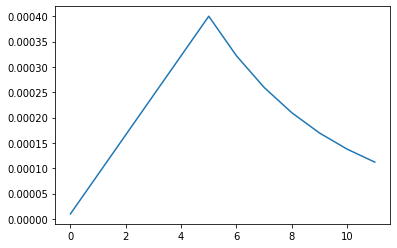

In [65]:
start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005 * strategy.num_replicas_in_sync
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
  if epoch < rampup_epochs:
    return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
  elif epoch < rampup_epochs + sustain_epochs:
    return max_lr
  else:
    return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=True)

rang = np.arange(EPOCHS)
y = [lrfn(x) for x in rang]
plt.plot(rang, y)
print('Learning rate per epoch:')

In [ ]:
#list(training_dataset.take(1))

In [ ]:
# with strategy.scope():
#     pretrained_model = tf.keras.applications.VGG16(
#         weights='imagenet',
#         include_top=False ,
#         input_shape=[*IMAGE_SIZE, 3]
#     )
#     pretrained_model.trainable = False
    
#     model = tf.keras.Sequential([
#         # To a base pretrained on ImageNet to extract features from images...
#         pretrained_model,
#         # ... attach a new head to act as a classifier.
#         tf.keras.layers.GlobalAveragePooling2D(),
#         tf.keras.layers.Dense(len(CLASSES), activation='softmax')
#     ])
    
    

In [108]:
#Build and compile model

from tensorflow.keras.layers import Input, Dense, Activation,Dropout, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, add, Flatten
from tensorflow.keras import Sequential

# first = Sequential()
# first.add(Conv2D(kernel_size=3, filters=16, padding='same', activation='relu', input_shape=[*IMAGE_SIZE, 3]))
# first.add(Flatten())
# first.add(Dense(1, activation='sigmoid'))

first_input=Input(shape = (*IMAGE_SIZE, 3))
conv_input_1 = Conv2D(kernel_size=3, filters=16, padding='same', activation='relu')(first_input)
conv_input_2 = Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(conv_input_1)
conv_input = Conv2D(kernel_size=3, filters=64, padding='same', activation='relu')(conv_input_2)
pool_input = GlobalAveragePooling2D()(conv_input)
first_dense = Dense(1, )(pool_input)
out_img = Dense(1,'sigmoid')(first_dense)

second_input = Input(shape=(19, ))
dense_layer_1 = Dense(25, activation='relu')(second_input)
dense_layer_2 = Dense(25, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
second_dense = Dense(1, )(dense_layer_3)
out_zero = Dense(1,'sigmoid')(second_dense)

merge_one = concatenate([first_dense, second_dense])
out_one = Dense(1,'sigmoid')(merge_one)


third_input = Input(shape=(2, ))
third_dense = Dense(1,)(third_input)

merge_two = concatenate([merge_one, third_dense])
out_two = Dense(1,'sigmoid')(merge_two)

model = Model(inputs=[first_input, second_input], outputs=out_img)



In [ ]:
print(Dense.__doc__)

In [ ]:
with strategy.scope():
    model = tf.keras.Sequential([
        
        tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu', input_shape=[*IMAGE_SIZE, 3]),
        #tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
        #  tf.keras.layers.MaxPooling2D(pool_size=2),
        
        #  tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
        # tf.keras.layers.MaxPooling2D(pool_size=2),
        
        # tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
        # tf.keras.layers.MaxPooling2D(pool_size=2),
        
        # tf.keras.layers.Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'),
        
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,'sigmoid')
    ])

In [109]:
model.compile(
        optimizer='adam',
        loss = 'binary_crossentropy',
        metrics = ['AUC']
    )

model.summary()

Model: "functional_36"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_56 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 256, 256, 16) 448         input_56[0][0]                   
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 256, 256, 32) 4640        conv2d_28[0][0]                  
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 256, 256, 64) 18496       conv2d_29[0][0]                  
______________________________________________________________________________________

In [ ]:
t0 = time.time()
history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    #validation_split=0.3,
    epochs=EPOCHS,
    steps_per_epoch=TRAIN_STEPS,
    callbacks=[lr_callback]
)
t1 = time.time()
print(t1-t0)


Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/12
  2/776 [..............................] - ETA: 3:56 - loss: 0.5437 - auc: 0.8514WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0013s vs `on_train_batch_end` time: 0.6077s). Check your callbacks.


776/776 [==============================] - 439s 566ms/step - loss: 0.2090 - auc: 0.5855 - val_loss: 0.0814 - val_auc: 0.7371

Epoch 00002: LearningRateScheduler reducing learning rate to 8.8e-05.
Epoch 2/12
776/776 [==============================] - 444s 573ms/step - loss: 0.0892 - auc: 0.6959 - val_loss: 0.0780 - val_auc: 0.7349

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000166.
Epoch 3/12
776/776 [==============================] - 445s 574ms/step - loss: 0.0865 - auc: 0.6933 - val_loss: 0.0783 - val_auc: 0.7385

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000244.
Epoch 4/12
776/776 [==============================] - 440s 567ms/step - loss: 0.0850 - auc: 0.6822 - val_loss: 0.0772 - val_auc: 0.7466

Epoch 00005: LearningRateScheduler reducing learning rate to 0.000322.
Epoch 5/12
776/776 [==============================] - 440s 567ms/step - loss: 0.0915 - auc: 0.7005 - val_loss: 0.0790 - val_auc: 0.7601

Epoch 00006: LearningRateScheduler reducing

In [17]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1:
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        #plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['training', 'validation'])


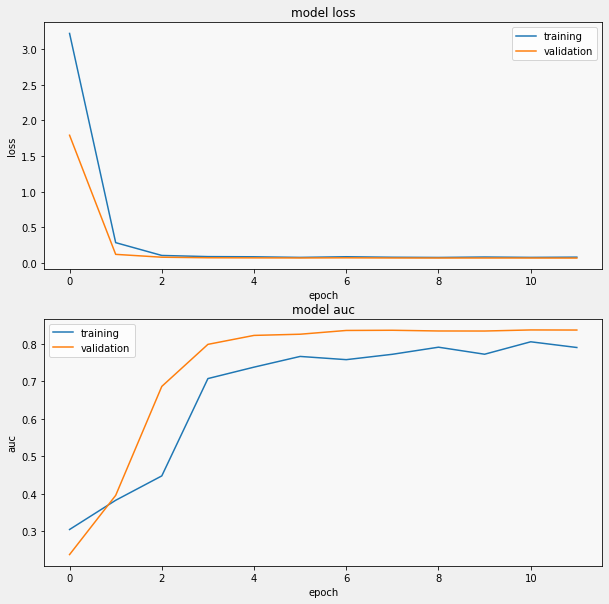

In [94]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss',
    211,
)
display_training_curves(
    history.history['auc'],
    history.history['val_auc'],
    'auc',
    212,
)

In [ ]:
test_ds = get_test_dataset(ordered=True)

print('Computing predictions...')
test_images_ds = test_dataset.map(lambda image, idnum: image)
probabilities = model.predict(test_images_ds)
predictions = np.argmax(probabilities, axis=-1)
print(predictions)

In [ ]:
print('Generating submission.csv file...')

# Get image ids from test set and convert to unicode
test_ids_ds = test_ds.map(lambda image, idnum: idnum).unbatch()
test_ids = next(iter(test_ids_ds.batch(NUM_TEST_IMAGES))).numpy().astype('U')

# Write the submission file
np.savetxt(
    'submission.csv',
    np.rec.fromarrays([test_ids, predictions]),
    fmt=['%s', '%d'],
    delimiter=',',
    header='id,label',
    comments='',
)

# Look at the first few predictions
!head submission.csv
